In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv('testData.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [33]:
import gower

# cat = [False] * len(data.columns)

# print(cat)

gd = gower.gower_matrix(data)

print(f"Data shape: {data.shape}\nMatrix shape: {distance_matrix.shape}")

Data shape: (440, 8)
Matrix shape: (440, 440)


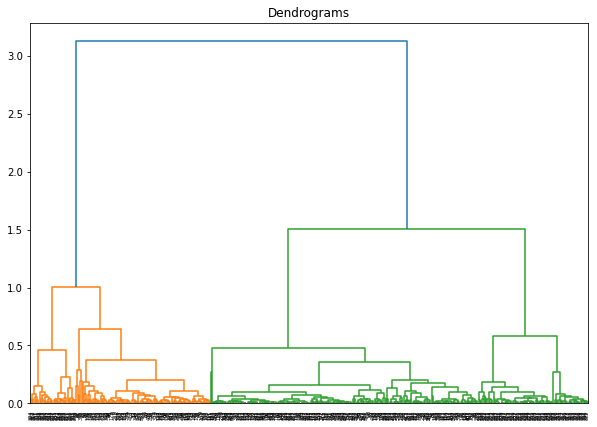

In [37]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

gdv = squareform(gd,force='tovector')

# output matrix has format [idx1, idx2, dist, sample_count]
Z = linkage(gdv,method='ward')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)


In [38]:
print(dend)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [35.0, 35.0, 52.5, 52.5], [12.5, 12.5, 43.75, 43.75], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [115.0, 115.0, 125.0, 125.0], [135.0, 135.0, 145.0, 145.0], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [140.0, 140.0, 162.5, 162.5], [120.0, 120.0, 151.25, 151.25], [92.5, 92.5, 135.625, 135.625], [75.0, 75.0, 114.0625, 114.0625], [28.125, 28.125, 94.53125, 94.53125], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [195.0, 195.0, 212.5, 212.5], [185.0, 185.0, 203.75, 203.75], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [194.375, 194.375, 242.5, 242.5], [275.0, 275.0, 285.0, 285.0], [265.0, 265.0, 280.0, 280.0], [218.4375, 218.4375, 272.5, 272.5], [295.0, 295.0, 305.0, 305.0], [325.0, 325.0, 335.0, 335.0], [345.0, 345.0, 355.0, 355.0], [330.0, 330.0, 350.0, 350.0], [315.0, 315.0, 340.0, 340.0], [300.0, 300.0, 327.5, 327.5]

In [16]:
'''this is for if we have numeric only'''
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


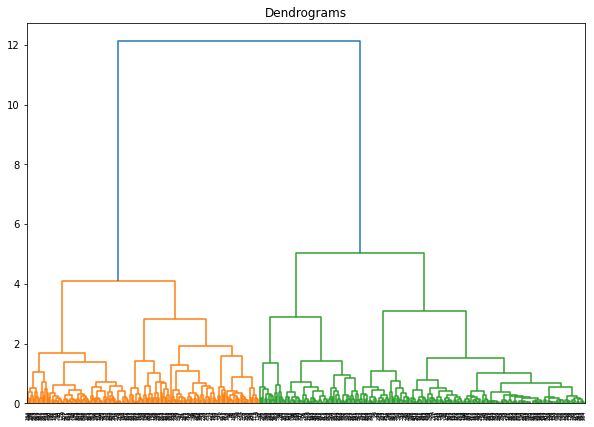

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

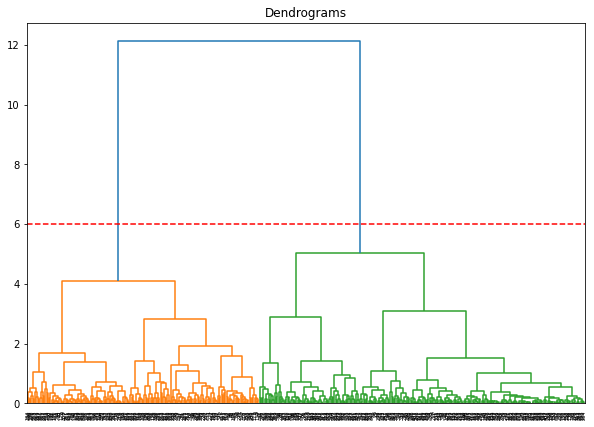

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

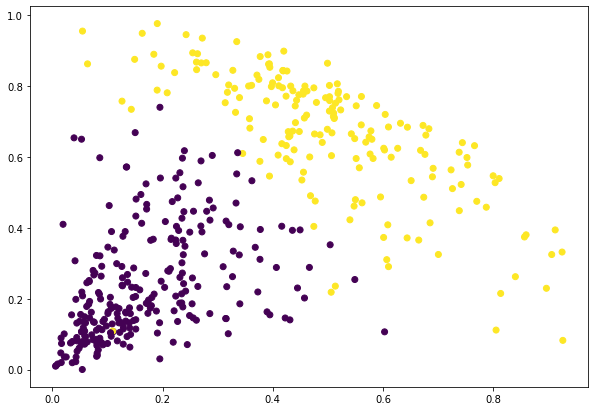

In [8]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [22.5, 22.5, 53.75, 53.75],
  [5.0, 5.0, 38.125, 38.125]],
 'dcoord': [[0.0, 0.47178821309917673, 0.47178821309917673, 0.0],
  [0.0, 0.5855417071567129, 0.5855417071567129, 0.47178821309917673],
  [0.0, 0.47181830528906626, 0.47181830528906626, 0.0],
  [0.0, 0.5880372297739299, 0.5880372297739299, 0.47181830528906626],
  [0.0, 0.6198589998278438, 0.6198589998278438, 0.5880372297739299],
  [0.5855417071567129,
   0.6946257542922052,
   0.6946257542922052,
   0.6198589998278438],
  [0.0, 0.9296863213402743, 0.9296863213402743, 0.6946257542922052]],
 'ivl': ['2', '6', '1', '5', '7', '3', '0', '4'],
 'leaves': [2, 6, 1, 5, 7, 3, 0, 4],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

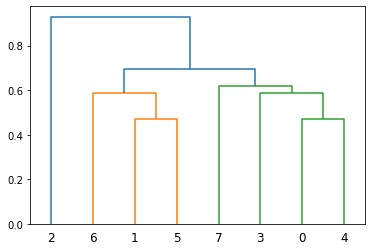

In [41]:
Xd=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30],
'gender':['M','M','M','M','F','F','F','F'],
'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED'],
'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0],
'has_children':[1,0,1,1,1,0,0,1],
'available_credit':[2200,100,22000,1100,2000,100,6000,2200]})
Yd = Xd.iloc[0:1,:]

X = np.asarray(Xd)
dm = gower.gower_matrix(X)
Zd = linkage(dm) 
dendrogram(Zd) 

In [47]:
rootnode, nodelist = shc.to_tree(Zd, rd=True)
print(nodelist)

[<scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F048>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F088>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F0C8>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F148>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F188>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F1C8>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F208>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F248>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F288>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F2C8>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F308>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F348>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F388>, <scipy.cluster.hierarchy.ClusterNode object at 0x000001CB41C9F3C8>, <scipy.cluster.hierarchy.ClusterNode object at 